## Descripció

L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

## Nivell 1

L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

**- Exercici 1:**
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

2 tipus d'entrada (línea): les **connexions dummy** i les **entrades reals**.

Dintre de les **entrades reals**, les variables a considerar serien les següents (entre parentesis l'expresió regular que les identifica:
* IP de qui entra (r'(\ d {1,3} \. \ d {1,3} \. \ d {1,3} \. \ d {1,3})'). 
* Data de la visita (r'[0-3][0-9]/\w{3}/\d{4}',re.IGNORECASE) 
* Hora de la visita (r'\d{2}:\d{2}:\d{2}') 
* Acció que realitza (GET|POST|HEAD)
* Objecte de l'acció (string deliminat per acció (punt previ) a l'esquerra i per ' HTTP/1.1' a la dreta)

Dintre de les **connexions dummy**, les variables a considerar serien les següents (entre parentesis l'expresió regular que les identifica:
* Data de la connexió (r'[0-3][0-9]/\w{3}/\d{4}',re.IGNORECASE) 
* Hora de la connexió  (r'\d{2}:\d{2}:\d{2}') 


## Nivell 2

**- Exercici 2:**
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline   

In [287]:
def list_lines (file): #dividir text en línees a partir d'un arxiu de text
    f = open(file, "r")
    lines = f.readlines()
    f.close()
    return lines

In [288]:
#funcions per extreure les variables de cada línea

def search_IP(line):
    pattern = re.compile(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})') 
    ip=pattern.search(line)[0]
    return ip
   
def search_date(line):
    pattern = re.compile(r'[0-3][0-9]/\w{3}/\d{4}',re.IGNORECASE) 
    date= pattern.search(line)[0]
    return date
    
def search_hour(line):
    pattern = re.compile(r':\d{2}:\d{2}:\d{2}')  
    hour= pattern.search(line)[0][1:]
    return hour
 
def search_action(line):
    line =line.split(' HTTP/1.1')[0]
    pattern = re.compile(r'(GET|POST|HEAD).+') 
    action= pattern.search(line)[0]
    return action

In [289]:
#l'havia escrita però no se si es necesaria:   
def search_web(line):
    #pattern = re.compile(r'http://www[^"]+',re.IGNORECASE)  
    pattern =re.compile('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+')
    
    web='None'
    if pattern.search(line)[0]!=None:
        web= str(pattern.search(line)[0])    
    return web

In [290]:
text_lines=list_lines('Web_access_log-akumenius.com.txt')
position_dummy=[]
position_visits=[]
list_IP=[]
list_dates=[]
list_hours=[]
list_actions=[]
list_dates_dummy=[]
list_hours_dummy=[]
for i in range (0, len(text_lines)): #1r distingeix entre els dos tipus de línea i després extreu informació
    primera_paraula=text_lines[i].split()[0]
    if re.match(r"^www",primera_paraula):
        position_visits.append(i)
        list_IP.append(search_IP(text_lines[i]))
        list_dates.append(search_date(text_lines[i]))
        list_hours.append(search_hour(text_lines[i]))
        list_actions.append(search_action(text_lines[i]))
    
    elif re.match(r"^local",primera_paraula):
        list_dates_dummy.append(search_date(text_lines[i]))
        list_hours_dummy.append(search_hour(text_lines[i]))
        position_dummy.append(i)

print (f'número de connexions dummy: {len(position_dummy)}.')
print (f'número de connexions reals: {len(position_visits)}.')
print (len(text_lines))
print (len(list_dates))
print(len(list_actions))
print (len(list_hours))

número de connexions dummy: 14127.
número de connexions reals: 232300.
261873
232300
232300
232300


In [291]:
df_logins=pd.DataFrame(list(zip(list_IP, list_dates,list_hours, list_actions)),columns=['IP','Date','Hour','Action'])
df_dummies=pd.DataFrame(list(zip(list_dates_dummy,list_hours_dummy)),columns=['Date','Hour'])

In [292]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232300 entries, 0 to 232299
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   IP      232300 non-null  object
 1   Date    232300 non-null  object
 2   Hour    232300 non-null  object
 3   Action  232300 non-null  object
dtypes: object(4)
memory usage: 7.1+ MB


In [9]:
df_logins.IP.nunique()

2764

In [293]:
df_logins.Date.unique()

array(['23/Feb/2014', '24/Feb/2014', '25/Feb/2014', '26/Feb/2014',
       '27/Feb/2014', '28/Feb/2014', '01/Mar/2014', '02/Mar/2014'],
      dtype=object)

In [294]:
df_logins.Action.nunique()
ip_entries=list(df_logins.IP.unique())
ip_entries

['66.249.76.216',
 '5.255.253.53',
 '157.55.35.112',
 '193.111.141.116',
 '5.10.83.71',
 '180.76.5.223',
 '180.76.6.148',
 '180.76.5.188',
 '180.76.6.135',
 '180.76.6.44',
 '180.76.5.172',
 '180.76.5.18',
 '157.56.92.174',
 '74.86.158.107',
 '180.76.6.136',
 '5.10.83.87',
 '5.10.83.21',
 '5.10.83.31',
 '180.76.5.64',
 '180.76.5.31',
 '180.76.5.27',
 '180.76.5.65',
 '157.55.33.97',
 '217.12.28.5',
 '180.76.6.64',
 '5.10.83.64',
 '180.76.5.195',
 '180.76.6.40',
 '180.76.5.200',
 '131.253.24.3',
 '199.30.20.223',
 '180.76.6.50',
 '180.76.5.168',
 '157.55.32.88',
 '5.10.83.88',
 '180.76.5.23',
 '180.76.5.145',
 '180.76.6.16',
 '176.31.255.177',
 '185.10.104.131',
 '180.76.6.55',
 '180.76.5.95',
 '180.76.6.59',
 '157.55.33.26',
 '180.76.5.213',
 '192.81.215.7',
 '180.76.6.133',
 '5.10.83.52',
 '174.129.237.157',
 '180.76.5.38',
 '180.76.5.177',
 '180.76.6.21',
 '180.76.6.159',
 '180.76.5.199',
 '180.76.6.157',
 '157.55.32.183',
 '180.76.6.146',
 '180.76.6.130',
 '180.76.6.230',
 '180.76.5.1

In [12]:
df_logins.columns

Index(['IP', 'Date', 'Hour', 'Action'], dtype='object')

In [295]:
df_logins[df_logins['Date']=='02/Mar/2014'].Hour.max()

'03:09:52'

In [296]:
df_logins[df_logins['Date']=='23/Feb/2014'].Hour.min()

'03:10:31'

L'arxiu recull just una setmana de temps començant i acabant el registre a les 3.10 (am) del diumenge.

In [297]:
df_logins.Hour.max()

'23:59:59'

In [298]:
df_logins.Hour.min()

'00:00:00'

In [299]:
df_logins['object_action']=df_logins['Action'].map(lambda x:x.split()[1])
df_logins['Action']=df_logins['Action'].map(lambda x:x.split()[0])

In [300]:
df_logins['Action'].unique()

array(['GET', 'HEAD', 'POST'], dtype=object)

In [301]:
df_logins

,IP,Date,Hour,Action,object_action
0,66.249.76.216,23/Feb/2014,03:10:31,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...
1,66.249.76.216,23/Feb/2014,03:10:33,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...
2,66.249.76.216,23/Feb/2014,03:10:35,GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...
3,66.249.76.216,23/Feb/2014,03:10:38,GET,/hoteles-baratos/ofertas-hotel-Kensington-Town...
4,66.249.76.216,23/Feb/2014,03:10:39,GET,/destinos-baratos/destinosEstrelles/hoteles-en...
...,...,...,...,...,...
232295,66.249.76.216,02/Mar/2014,03:05:11,GET,/escapadas/romanticas-murcia-662/1.html
232296,5.255.253.53,02/Mar/2014,03:05:32,GET,/robots.txt
232297,5.255.253.53,02/Mar/2014,03:05:34,GET,/
232298,5.255.253.53,02/Mar/2014,03:05:39,GET,/


En 8 dies entren a la pàgina 2764 IPs diferents, es fan 68300 accions diferents.

In [302]:
df_logins.groupby('Action').count()

,IP,Date,Hour,object_action
Action,,,,
GET,215081,215081,215081,215081
HEAD,1693,1693,1693,1693
POST,15526,15526,15526,15526


La majoria d'entrades a la web són per obtenir informació (92,7%), hi ha un petit percentatge d'entrades per afegir informació (6,7%) i un molt petit denominat com a Head que crec que pot ser de manteniment o control de la web (0,7%). 

**- Exercici 3:**
Geolocalitza les IP's.

Fonts de metodologies provades:

https://www.altaruru.com/python-localizar-ip/

https://pythondiario.com/2019/02/ipgeopy-geolocalizacion-de-direcciones.html

Després de diferents intents, veig que les pàgines web estan capades per a donar la informació de forma limitada, la única manera que trobo de fer-ho és per la pàgina https://ip-api.com però cal que limiti la cerca d'informació a unes 44 IPs cada minut. Amb aquesta finalitat afegeixo un 'sleep' o pausa en el programa per a que vagi al ritme adequat.

In [303]:
# requests: Permet realizar peticions HTTP.
import requests

# json: Permet treballar amb les respostes de l'api.
import json

# URL de l'API
api_url = "http://ip-api.com/json/"

# Definim els parametres de la resposta que volem obtenir,com: País, ciutat, Codi postal, zona horaria, regió,...
parametros = 'country,countryCode,region,regionName,city,zip,lat,lon,timezone'
data = {"fields":parametros}
par = parametros.split(",") #generem llista

# Declarem la funció que es conectarà amb API i ens tornarà resposta.
def ip_scraping(ip=""):
    # Connexió amb API
    res = requests.get(api_url+ip, data=data)

    # Obtenim i precessem la resposta JSON
    api_json_res = json.loads(res.content)
    
    return api_json_res #retorna diccionari


In [304]:
par

['country',
 'countryCode',
 'region',
 'regionName',
 'city',
 'zip',
 'lat',
 'lon',
 'timezone']

In [306]:
#generem DataFrame amb IPs i la seva localització fila a fila:
import time
df_loc_IP=pd.DataFrame()
list_IPs_unic=df_logins.IP.unique()
#new_line={'ip':'None','country':'None', 'countryCode':'None', 'region':'None','regionName':'None', 'city':'None', 'zip':'None', 'lat':0, 'lon':0, 'timezone':'None'}
a=0
for ip in list_IPs_unic:
    a+=1
    if a%44==0:
        for j in range(1,62): #sleep de 61 segons, fa print cada 5
            if j%5==0:
                print(j, end=' ') #contador que surt cada 5 segons per a veure que tot va rutllant bé.
            time.sleep(1)
        print(f'Ja portem {a} IPs recercades. Seguim!')    #ens diu per on estem
       
    new_line={}
    dict_ip=ip_scraping(ip).copy()
    new_line['ip']=ip
    for x in par:
        new_line[x]= dict_ip[x]
    df_loc_IP=df_loc_IP.append(new_line, ignore_index=True)#Afegim una fila al dataframe

5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 44 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 88 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 132 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 176 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 220 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 264 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 308 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 352 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 396 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 440 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 484 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 528 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 572 IPs recercades. Seguim!
5 10 15 20 25 30 35 40 45 50 55 60 Ja portem 616 IPs 

In [308]:
df_loc_IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ip           2764 non-null   object 
 1   country      2764 non-null   object 
 2   countryCode  2764 non-null   object 
 3   region       2764 non-null   object 
 4   regionName   2764 non-null   object 
 5   city         2764 non-null   object 
 6   zip          2764 non-null   object 
 7   lat          2764 non-null   float64
 8   lon          2764 non-null   float64
 9   timezone     2764 non-null   object 
dtypes: float64(2), object(8)
memory usage: 216.1+ KB


In [309]:
df_loc_IP.to_csv('IPs_locations.csv', header=True, index=False) #guardo com a csv i així no cal que el torni a generar.

Verifico que hi han els registres que toquen, el tipus de valors i que no n'hi ha de nuls:

In [310]:
df_loc_IP.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ip           2764 non-null   object 
 1   country      2764 non-null   object 
 2   countryCode  2764 non-null   object 
 3   region       2764 non-null   object 
 4   regionName   2764 non-null   object 
 5   city         2764 non-null   object 
 6   zip          2764 non-null   object 
 7   lat          2764 non-null   float64
 8   lon          2764 non-null   float64
 9   timezone     2764 non-null   object 
dtypes: float64(2), object(8)
memory usage: 216.1+ KB


Verifico l'estructura del DataFrame:

In [311]:
df_loc_IP.head()

,ip,country,countryCode,region,regionName,city,zip,lat,lon,timezone
0,66.249.76.216,United States,US,CA,California,Mountain View,94043,37.4220,-122.0840,America/Los_Angeles
1,5.255.253.53,Russia,RU,MOW,Moscow,Moscow,101194,55.7332,37.5833,Europe/Moscow
2,157.55.35.112,Canada,CA,ON,Ontario,Toronto,M5A,43.6532,-79.3832,America/Toronto
3,193.111.141.116,Germany,DE,NW,North Rhine-Westphalia,Düsseldorf,40472,51.2705,6.8144,Europe/Berlin
4,5.10.83.71,Netherlands,NL,NH,North Holland,Amsterdam,1012,52.3759,4.8975,Europe/Amsterdam


  La columna de zip presenta blancs (adreces de la China per exemple), s'hauria de valorar la seva necessitat... Ho deixo perquè pot ser útil per estudis en zones més concretes/menys extenses que sí que tinguin les dades.

## Nivell 3

**- Exercici 4:**
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

Per a extreure informació geogràfica del registre d'entrades de la web extraurem informació dels datagrames d'entrades i del de localització de les IPs: 

In [163]:
ip_loc=pd.DataFrame(pd.read_csv('IPs_locations.csv'), index=None)


In [164]:
ip_loc['continent']=ip_loc['timezone'].map(lambda x: x.split('/')[0])

In [165]:
ip_loc.rename(columns={'ip':'IP'},inplace=True)

In [166]:
ip_loc.columns

Index(['IP', 'country', 'countryCode', 'region', 'regionName', 'city', 'zip',
       'lat', 'lon', 'timezone', 'continent'],
      dtype='object')

In [167]:
ip_loc.head()

,IP,country,countryCode,region,regionName,city,zip,lat,lon,timezone,continent
0,180.76.5.192,China,CN,BJ,Beijing,Beijing,NaN,39.9042,116.4070,Asia/Shanghai,Asia
1,5.10.83.22,Netherlands,NL,NH,North Holland,Amsterdam,1012,52.3759,4.8975,Europe/Amsterdam,Europe
2,157.55.35.43,Canada,CA,ON,Ontario,Toronto,M5A,43.6532,-79.3832,America/Toronto,America
3,180.76.6.62,China,CN,BJ,Beijing,Beijing,NaN,39.9042,116.4070,Asia/Shanghai,Asia
4,217.16.255.159,Spain,ES,CT,Catalonia,Abrera,08630,41.5139,1.8982,Europe/Madrid,Europe


In [168]:
ip_loc['timezone'].nunique()

79

In [169]:
ip_loc['country'].nunique()

57

In [170]:
ip_loc['region'].nunique()

174

In [171]:
ip_loc['city'].nunique()

690

In [172]:
ip_loc['continent'].unique()

array(['Asia', 'Europe', 'America', 'Atlantic', 'Africa', 'Australia'],
      dtype=object)

Les visites es donen des de 690 ciutats diferents que es troben en 174 regions diferents i aquestes estan dintre de 57 paisos diferents. Però tenen totes igual rellevància en la millora del servei? 


In [173]:
#generem datcolumnes extra buides al dataframe 
df_logins.reindex(['ip', 'Date', 'Hour', 'Action', 'object_action','country', 'countryCode', 'region', 'regionName', 'city', 'continent'])
df_logins['country']='unknown'
df_logins['countryCode']='unknown'
df_logins['region']='unknown'
df_logins['regionName']='unknown'
df_logins['city']='unknown'
df_logins['continent']='unknown'

In [174]:
df_logins

,IP,Date,Hour,Action,Day_of_Week,country,countryCode,region,regionName,city,continent
0,66.249.76.216,23/Feb/2014,03:10:31,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,Sun,unknown,unknown,unknown,unknown,unknown,unknown
1,66.249.76.216,23/Feb/2014,03:10:33,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,Sun,unknown,unknown,unknown,unknown,unknown,unknown
2,66.249.76.216,23/Feb/2014,03:10:35,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,Sun,unknown,unknown,unknown,unknown,unknown,unknown
3,66.249.76.216,23/Feb/2014,03:10:38,GET /hoteles-baratos/ofertas-hotel-Kensington-...,Sun,unknown,unknown,unknown,unknown,unknown,unknown
4,66.249.76.216,23/Feb/2014,03:10:39,GET /destinos-baratos/destinosEstrelles/hotele...,Sun,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
232295,66.249.76.216,02/Mar/2014,03:05:11,GET /escapadas/romanticas-murcia-662/1.html,Sun,unknown,unknown,unknown,unknown,unknown,unknown
232296,5.255.253.53,02/Mar/2014,03:05:32,GET /robots.txt,Sun,unknown,unknown,unknown,unknown,unknown,unknown
232297,5.255.253.53,02/Mar/2014,03:05:34,GET /,Sun,unknown,unknown,unknown,unknown,unknown,unknown
232298,5.255.253.53,02/Mar/2014,03:05:39,GET /,Sun,unknown,unknown,unknown,unknown,unknown,unknown


In [175]:
#Completem dataframe de visites amb localitzacions de les IP:
contador=0
for ips in list(ip_loc['IP']):
    line_dict={'country':ip_loc.loc[contador].country, 'countryCode':ip_loc.loc[contador].countryCode,'region':ip_loc.loc[contador].region, 'regionName':ip_loc.loc[contador].regionName, 'city':ip_loc.loc[contador].city, 'continent':ip_loc.loc[contador].continent}
    contador+=1
    extracols=['country', 'countryCode', 'region', 'regionName', 'city', 'continent']
    for x in extracols:
        df_logins.loc[df_logins['IP']==ips,x]=line_dict[x]
  

In [176]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232300 entries, 0 to 232299
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   IP           232300 non-null  object
 1   Date         232300 non-null  object
 2   Hour         232300 non-null  object
 3   Action       232300 non-null  object
 4   Day_of_Week  232300 non-null  object
 5   country      232300 non-null  object
 6   countryCode  232300 non-null  object
 7   region       232129 non-null  object
 8   regionName   232300 non-null  object
 9   city         232300 non-null  object
 10  continent    232300 non-null  object
dtypes: object(11)
memory usage: 19.5+ MB


In [177]:
df_logins.head()

,IP,Date,Hour,Action,Day_of_Week,country,countryCode,region,regionName,city,continent
0,66.249.76.216,23/Feb/2014,03:10:31,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,Sun,United States,US,CA,California,Mountain View,America
1,66.249.76.216,23/Feb/2014,03:10:33,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,Sun,United States,US,CA,California,Mountain View,America
2,66.249.76.216,23/Feb/2014,03:10:35,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,Sun,United States,US,CA,California,Mountain View,America
3,66.249.76.216,23/Feb/2014,03:10:38,GET /hoteles-baratos/ofertas-hotel-Kensington-...,Sun,United States,US,CA,California,Mountain View,America
4,66.249.76.216,23/Feb/2014,03:10:39,GET /destinos-baratos/destinosEstrelles/hotele...,Sun,United States,US,CA,California,Mountain View,America


In [178]:
df_logins.to_csv('df_logins_and_locs.csv',header=True,index=False)

In [224]:
df_visit_by_country= pd.DataFrame(df_logins.groupby('country').count().Date)

df_visit_by_country.rename(columns={'Date':'Visits'},inplace=True)

In [225]:
#Extraiem llistats sense modificar ordre per les gràfiques posteriors (gràfica mundial)
world_countries=list(df_logins.groupby('country').count().Date.index).copy()
world_countries_codes=list(df_logins.groupby('countryCode').count().Date.index).copy()
z_values=list(df_visit_by_country.loc[:,'Visits'].values).copy()                          

In [40]:
total_visits=df_visit_by_country.Visits.sum() #veiem llista dels top 10 paisos en número de connexions
df_visit_by_country['Percentage']=(100*df_visit_by_country['Visits']/total_visits).round(2)
df_visit_by_country.sort_values('Visits',ascending=False,inplace=True)
df_visit_by_country.head(10)

,Visits,Percentage
country,,
Spain,134859,58.05
United States,63405,27.29
Canada,6923,2.98
China,6863,2.95
Netherlands,6370,2.74
Germany,2027,0.87
France,1627,0.70
Mexico,1244,0.54
United Kingdom,1095,0.47


In [41]:
df_visit_by_country.iloc[0:10].Percentage.sum()

97.04

In [42]:
df_visit_by_country.iloc[0:5].Percentage.sum()

94.01

La majoria de visites venen d'Espanya, si hi sumem els 5 primers paisos són e 94%. Si fem els 10 el 97%.

A part de l'estudi del llistat del top 10, generem mapa mundial interactiu per visualitzar les dades:

In [149]:
#Importem moduls requerits
from plotly import __version__
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requereix versio >= 1.9.0 (cal instalar plotly o update si no es té la versió adequada)

5.5.0


In [150]:
# For Notebooks
init_notebook_mode(connected=True)

In [240]:
data = dict(
        type = 'choropleth',
        locations = world_countries,
        locationmode='country names',
        z = z_values,
        text = world_countries,
        colorbar = {'title' : '# of Visits'},
        colorscale='Viridis_r'
      ) 

layout = dict(
    title = 'Origin of the Visits to the web akumenius.com',
    geo = dict(
        showframe = False,
        projection = {'type':'cylindrical stereographic'}
    )
)

In [242]:
choromap = go.Figure(data = [data],layout = layout)
#plot(choromap,  filename='Origin of the Visits to the web.html') #genera arxiu html amb gràfica interactiva
iplot(choromap)

Tant del llistat com de la representació gràfica, es pot veure que majoritariament les visites provenen d'Espanya i estats units. Cal esmentar que gràficament es perd força la data de Nederlands: al ser un pais molt petit no ressalta gens el tenir un color una mica diferent (com sí que fan Canada i China).

Faig un estudi dels visitants d'Estats Units anant més al detall i zones més petites (-->Regió -->Ciutat) :

In [43]:
df_visits_US=df_logins[df_logins['country']=='United States'].copy()

In [44]:
df_visits_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63405 entries, 0 to 232299
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IP           63405 non-null  object
 1   Date         63405 non-null  object
 2   Hour         63405 non-null  object
 3   Action       63405 non-null  object
 4   Day_of_Week  63405 non-null  object
 5   country      63405 non-null  object
 6   countryCode  63405 non-null  object
 7   region       63405 non-null  object
 8   regionName   63405 non-null  object
 9   city         63405 non-null  object
 10  continent    63405 non-null  object
dtypes: object(11)
memory usage: 5.8+ MB


In [206]:
#Agrupem per regions i representem graficament:
df_visits_US_region=pd.DataFrame(df_visits_US.groupby('region').count().Date)
locations=list(df_visits_US_region.index)
z_values=list(df_visits_US_region.loc[:,'Date'].values)
location_names=list(df_visits_US.groupby('regionName').count().Date.index)

data = dict(type = 'choropleth',
            locations = locations,
            locationmode = 'USA-states',
            colorscale= 'Greens',
            text= location_names,
            z=z_values,
            colorbar = {'title':'# of visits'})

In [207]:
layout = dict(title='Visits from USA to the web akumenius.com',geo = {'scope':'usa'})

In [209]:
choromap2 = go.Figure(data = [data],layout = layout)
#plot(choromap2,  filename='Visits from USA to the web.html') genera arxiu html amb gràfica interactiva
iplot(choromap2)

Clarament la majoria de visites es donen des de California. Dintre de California, fem una recerca per ciutats:

In [46]:
df_visits_CA=df_logins[df_logins['region']=='CA'].copy()

In [47]:
df_visits_CA.groupby('city').count().Date

city
Ceres                92
Chico                91
Mountain View     51055
San Diego            71
San Francisco         4
San Jose            420
Santa Clara           1
Torrance            147
Woodland Hills       48
Name: Date, dtype: int64

La raó de perquè hi ha tantes visites des de California és perquè el navegador Google les redirigeix amb el seu IP, que dona que l'origen de la visita és a California(USA) però la consulta molt provablement s'hagi fet des d'Espanya. L'aportació del navegador a les visites de la pàgina és molt important. El nombre de visites provinents de Mountain View es pot utilitzar com a mesura de l'efectivitat en el posicionament en les recerques en Google per a generar primeres visites a la pàgina web. Un cop coneguda i si hi ha interès, el més segur és que el possible client entri directament a la pàgina.

Ens centrem en l'estudi de les visites d'Espanya:

In [48]:
#Generem dataframe de visites d'Espanya
df_visits_Spain=df_logins[df_logins['country']=='Spain'].copy()

In [49]:
df_visits_Spain.city.nunique()

347

In [50]:
df_visits_Spain.regionName.unique()

array(['Andalusia', 'Catalonia', 'Madrid', 'Basque Country', 'Galicia',
       'Castille-La Mancha', 'Principality of Asturias',
       'Castille and León', 'Balearic Islands', 'Valencia',
       'Canary Islands', 'Aragon', 'Murcia', 'Navarre', 'Cantabria',
       'Extremadura', 'Melilla', 'La Rioja'], dtype=object)

In [87]:
def hour_converter(hour): #convertim hora en valor float = número d'hores del dia (de 0 a 24h)
    h=float(hour.split(':')[0])
    m=float(hour.split(':')[1])/60
    s=float(hour.split(':')[2])/3600
    return (h+m+s)


In [88]:
df_visits_Spain['Hores_format']=df_visits_Spain['Hour'].map(lambda x: hour_converter(x)) #generem columna nova amb hora
df_visits_Spain

,IP,Date,Hour,Action,Day_of_Week,country,countryCode,region,regionName,city,continent,Hores_format
242,217.12.28.5,23/Feb/2014,03:16:36,GET /libraries/anythingSlider/anythingSlider.css,Sun,Spain,ES,AN,Andalusia,Seville,Europe,3.276667
249,217.12.28.5,23/Feb/2014,03:16:49,GET /libraries/anythingSlider/images/5a.png,Sun,Spain,ES,AN,Andalusia,Seville,Europe,3.280278
451,217.12.28.5,23/Feb/2014,03:21:44,GET /modules/raton/views/themes/bcoos/images/b...,Sun,Spain,ES,AN,Andalusia,Seville,Europe,3.362222
855,217.12.28.5,23/Feb/2014,03:31:56,GET /includes/images/uploaded/ofertas-navidad.jpg,Sun,Spain,ES,AN,Andalusia,Seville,Europe,3.532222
917,217.12.28.5,23/Feb/2014,03:33:47,GET /libraries/anythingSlider/images/3a.png,Sun,Spain,ES,AN,Andalusia,Seville,Europe,3.563056
...,...,...,...,...,...,...,...,...,...,...,...,...
232269,83.45.25.198,02/Mar/2014,02:48:13,GET /chollos,Sun,Spain,ES,AN,Andalusia,Fuengirola,Europe,2.803611
232270,83.45.25.198,02/Mar/2014,02:48:14,GET /chollos,Sun,Spain,ES,AN,Andalusia,Fuengirola,Europe,2.803889
232271,83.45.25.198,02/Mar/2014,02:48:14,GET /favicon.ico,Sun,Spain,ES,AN,Andalusia,Fuengirola,Europe,2.803889
232272,83.45.25.198,02/Mar/2014,02:48:14,GET /escapadas,Sun,Spain,ES,AN,Andalusia,Fuengirola,Europe,2.803889


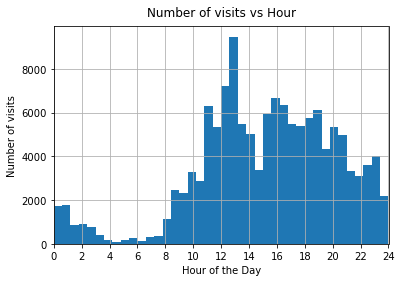

In [100]:
df_visits_Spain['Hores_format'].hist(bins=40)
plt.xlim(0,24)
plt.xticks(np.arange(0, 25, step=2))
plt.title('Number of visits vs Hour',pad=10)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of visits')
plt.show()

Veient que d'on venen la majoria de visites és d'Espanya, s'hauria d'ajustar les hores de manteniment de la web entre les 4 i les 5 de la matinada. D'altra banda, per fer algun tipus d'anunci o propaganda, el pic de visites es dona just al migdia (de 12 a 13h). Volem incorporar la variable del dia de la setmana:

In [51]:
#Generem columna amb Day_of_Week(com que per hores no es superposen, juntem 1r i ultim diumenges):
def day_of_week(date):
    day_of_week='Unknown'
    if date=='02/Mar/2014' or date== '23/Feb/2014':
         day_of_week='Sun'
    elif date=='24/Feb/2014':
         day_of_week='Mon'   
    elif date=='25/Feb/2014':
         day_of_week='Twe'
    elif date=='26/Feb/2014':
         day_of_week='Wed'
    elif date=='27/Feb/2014':
         day_of_week='Thu'
    elif date=='28/Feb/2014':
         day_of_week='Fri'
    elif date=='01/Mar/2014':
         day_of_week='Sat'
    return day_of_week

df_visits_Spain['Day_of_Week']=df_visits_Spain['Date'].map(lambda x: day_of_week(x))

In [77]:
# Ordenen dies de la setmana per ordre cronologic
daily_visits_df=pd.DataFrame(df_visits_Spain.groupby('Day_of_Week').count().IP) 
daily_visits_df=daily_visits_df.transpose()
daily_visits_df=daily_visits_df[['Mon' ,'Twe','Wed','Thu', 'Fri','Sat','Sun']]
daily_visits_df=daily_visits_df.transpose()

Text(0, 0.5, 'Number of visits')

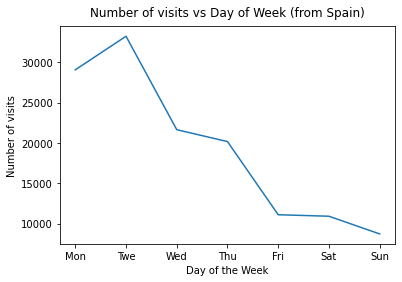

In [102]:
plt.plot(daily_visits_df)
plt.title('Number of visits vs Day of Week (from Spain)',pad=10)
plt.xlabel('Day of the Week')
plt.ylabel('Number of visits')

Les visites es produeixen sobretot els dilluns i dimarts!! Després del cap de setmana, al tornar a la feina, la gent té més ganes de planificar dies de lleure/viatges futurs. Quan menys es visita és diumenge.

Per fer plots geogràfics no predefinits:

Per obtenir planols:
https://gadm.org/download_country_v3.html

La manera de programar-ho:
https://analisisydecision.es/mapa-estatico-de-espana-con-python/

No m'hi poso en profunditat, no m'en surto perquè no hi vull dedicar massa temps, però pot ser una opció per graficacions puntuals de zones no standard.

Fem un estudi de les paraules que atreuen visites i estan incloses en la ruta html (que està dintre de Action), tals com **oferta/s**, **barato/a(s)** per veure el percentatge:

In [284]:
import re
pattern_barato = re.compile(r'barat.[s]?',re.IGNORECASE) 
pattern_oferta = re.compile(r'oferta[s]?',re.IGNORECASE) 

In [285]:
action_list=list(df_logins['Action'].unique())
barato=0 #contador de patern barata/o(s)
oferta=0 #contador de patern oferta(s)
for x in action_list:
    if get in x: #estudiamos solo las que extraen información
        x=x.split('T /')[1] #elimina GET / 
        if pattern_barato.search(x)!=None:
            barato+=1 
        if pattern_oferta.search(x)!=None:
            oferta+=1
           
    else:
        action_list.remove(x)

        
print(f'El percentatge de visites amb la paraula "oferta/s" a la ruta html és del {round((100*oferta/len(action_list)),2)}%.')
print(f'El percentatge de visites amb la paraula "barato/a(s)" a la ruta html és del {round(100*barato/len(action_list),2)}%.')

El percentatge de visites amb la paraula "oferta/s" a la ruta html és del 16.89%.
El percentatge de visites amb la paraula "barato/a(s)" a la ruta html és del 87.51%.


Podem concloure que l'estructura de la web vol atreure el primer click amb la paraula barato/a(s). Segurament, fa un ús més restringit de la paraula 'oferta' per a no semblar que tot sigui oferta.
Es tracta d'una agència de viatge enfocada al gran públic, el costat oposat seria una web que fes servir paraules com 'exclusivo/a(s)' o  'lujo'...